In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [26]:
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from src.preprocess.data_loading import load_preprocessed_data
from consts import DATASET_LABEL_TO_INDEX, DATASET_PATHS

In [20]:
pd.set_option('display.max_columns', 500)  # or 1000
pd.set_option('display.max_rows', 500)  # or 1000
pd.set_option('display.max_colwidth', 250)  # or 199

In [4]:
MY_COLORS = ['g', 'r', 'b', 'y', 'c']

In [5]:
def sample_data(df):
    unique_labels = df['sentiment'].unique()
    sample_df = pd.DataFrame(data=None, columns=df.columns)
    for unique_label in unique_labels:
        row = df[df['sentiment'] == unique_label].sample(n=1)
        sample_df.loc[len(sample_df)] = row.values[0]
    return sample_df

In [8]:
def plot_distributions(df):
    df['sentiment'].value_counts().plot(kind='bar', color=MY_COLORS)
    plt.title(f'{dataset_name} labels')
    plt.grid()
    plt.savefig(f'./figs/{dataset_name}_distribution.png', bbox_inches="tight")
    plt.show()

In [27]:
def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')
    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)
    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in mpl_table._cells.items():
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax.get_figure(), ax

Current dataset: imdb


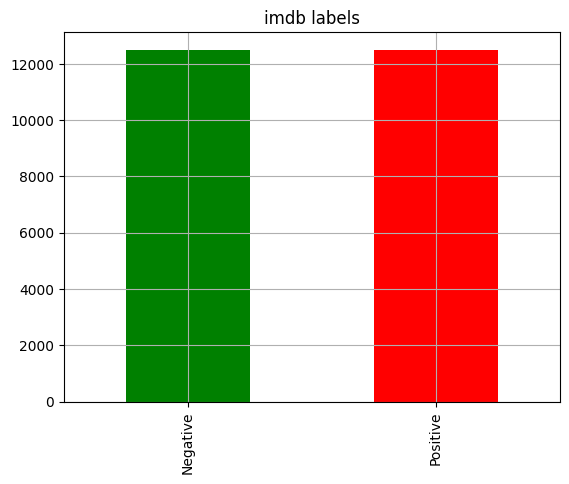

,text,sentiment
0,"The Cat in the Hat is just a slap in the face film. Mike Myers as The Cat in the Hat is downright not funny and Mike Myers could not have been any worse. This is his worst film he has ever been in. The acting and the story was just terrible. I mean how could they make the most beloved stories by Dr. Seuss be made into film and being one of the worst films of all-time and such a disappointment. I couldn't have seen a more worst film than this besides, maybe Baby Geniuses. But this film is just so bad I can't even describe how badly they made this film. Bo Welch should be fired or the writer should. <br /><br />Hedeen's outlook: 0/10 No Stars F",Negative
1,"In this 1943 film, Judy Garland is deemed not to be ready for the big-time yet by the man who loves her-Van Heflin. This film was certainly a big change for Mr. Heflin, especially after his supporting Oscar win the year before in ""Johnny Eager.""<br /><br />Wasn't Spring Byington too old to be the widowed mother of 5 children, with four of them appearing to look like her grandchildren?<br /><br />The singing and dancing are just marvelously staged but the way that the blossoming romance between Heflin and Garland was depicted left a lot to be desired. It was a Gigi-like one where a young girl is eventually swept off her feet by a charmer.",Positive


None


,text,clean_text
0,"The Cat in the Hat is just a slap in the face film. Mike Myers as The Cat in the Hat is downright not funny and Mike Myers could not have been any worse. This is his worst film he has ever been in. The acting and the story was just terrible. I mean how could they make the most beloved stories by Dr. Seuss be made into film and being one of the worst films of all-time and such a disappointment. I couldn't have seen a more worst film than this besides, maybe Baby Geniuses. But this film is just so bad I can't even describe how badly they made this film. Bo Welch should be fired or the writer should. <br /><br />Hedeen's outlook: 0/10 No Stars F",the cat in the hat is just a slap in the face film mike myers as the cat in the hat is downright not funny and mike myers could not have been any worse this is his worst film he has ever been in the acting and the story was just terrible i mean how could they make the most beloved stories by dr seuss be made into film and being one of the worst films of all time and such a disappointment i couldn t have seen a more worst film than this besides maybe baby geniuses but this film is just so bad i can t even describe how badly they made this film bo welch should be fired or the writer should br br hedeen s outlook 0 10 no stars f
1,"In this 1943 film, Judy Garland is deemed not to be ready for the big-time yet by the man who loves her-Van Heflin. This film was certainly a big change for Mr. Heflin, especially after his supporting Oscar win the year before in ""Johnny Eager.""<br /><br />Wasn't Spring Byington too old to be the widowed mother of 5 children, with four of them appearing to look like her grandchildren?<br /><br />The singing and dancing are just marvelously staged but the way that the blossoming romance between Heflin and Garland was depicted left a lot to be desired. It was a Gigi-like one where a young girl is eventually swept off her feet by a charmer.",in this 1943 film judy garland is deemed not to be ready for the big time yet by the man who loves her van heflin this film was certainly a big change for mr heflin especially after his supporting oscar win the year before in johnny eager br br wasn t spring byington too old to be the widowed mother of 5 children with four of them appearing to look like her grandchildren br br the singing and dancing are just marvelously staged but the way that the blossoming romance between heflin and garland was depicted left a lot to be desired it was a gigi like one where a young girl is eventually swept off her feet by a charmer


None


,clean_text,tokenized_clean_text
0,the cat in the hat is just a slap in the face film mike myers as the cat in the hat is downright not funny and mike myers could not have been any worse this is his worst film he has ever been in the acting and the story was just terrible i mean how could they make the most beloved stories by dr seuss be made into film and being one of the worst films of all time and such a disappointment i couldn t have seen a more worst film than this besides maybe baby geniuses but this film is just so bad i can t even describe how badly they made this film bo welch should be fired or the writer should br br hedeen s outlook 0 10 no stars f,"['the', 'cat', 'in', 'the', 'hat', 'is', 'just', 'a', 'slap', 'in', 'the', 'face', 'film', 'mike', 'myers', 'as', 'the', 'cat', 'in', 'the', 'hat', 'is', 'downright', 'not', 'funny', 'and', 'mike', 'myers', 'could', 'not', 'have', 'been', 'any', 'worse', 'this', 'is', 'his', 'worst', 'film', 'he', 'has', 'ever', 'been', 'in', 'the', 'acting', 'and', 'the', 'story', 'was', 'just', 'terrible', 'i', 'mean', 'how', 'could', 'they', 'make', 'the', 'most', 'beloved', 'stories', 'by', 'dr', 'seuss', 'be', 'made', 'into', 'film', 'and', 'being', 'one', 'of', 'the', 'worst', 'films', 'of', 'all', 'time', 'and', 'such', 'a', 'disappointment', 'i', 'couldn', 't', 'have', 'seen', 'a', 'more', 'worst', 'film', 'than', 'this', 'besides', 'maybe', 'baby', 'geniuses', 'but', 'this', 'film', 'is', 'just', 'so', 'bad', 'i', 'can', 't', 'even', 'describe', 'how', 'badly', 'they', 'made', 'this', 'film', 'bo', 'welch', 'should', 'be', 'fired', 'or', 'the', 'writer', 'should', 'br', 'br', 'hedeen', 's', 'outlook', '0', '10', 'no', 'stars', 'f']"
1,in this 1943 film judy garland is deemed not to be ready for the big time yet by the man who loves her van heflin this film was certainly a big change for mr heflin especially after his supporting oscar win the year before in johnny eager br br wasn t spring byington too old to be the widowed mother of 5 children with four of them appearing to look like her grandchildren br br the singing and dancing are just marvelously staged but the way that the blossoming romance between heflin and garland was depicted left a lot to be desired it was a gigi like one where a young girl is eventually swept off her feet by a charmer,"['in', 'this', '1943', 'film', 'judy', 'garland', 'is', 'deemed', 'not', 'to', 'be', 'ready', 'for', 'the', 'big', 'time', 'yet', 'by', 'the', 'man', 'who', 'loves', 'her', 'van', 'heflin', 'this', 'film', 'was', 'certainly', 'a', 'big', 'change', 'for', 'mr', 'heflin', 'especially', 'after', 'his', 'supporting', 'oscar', 'win', 'the', 'year', 'before', 'in', 'johnny', 'eager', 'br', 'br', 'wasn', 't', 'spring', 'byington', 'too', 'old', 'to', 'be', 'the', 'widowed', 'mother', 'of', '5', 'children', 'with', 'four', 'of', 'them', 'appearing', 'to', 'look', 'like', 'her', 'grandchildren', 'br', 'br', 'the', 'singing', 'and', 'dancing', 'are', 'just', 'marvelously', 'staged', 'but', 'the', 'way', 'that', 'the', 'blossoming', 'romance', 'between', 'heflin', 'and', 'garland', 'was', 'depicted', 'left', 'a', 'lot', 'to', 'be', 'desired', 'it', 'was', 'a', 'gigi', 'like', 'one', 'where', 'a', 'young', 'girl', 'is', 'eventually', 'swept', 'off', 'her', 'feet', 'by', 'a', 'charmer']"


None




Current dataset: yelp


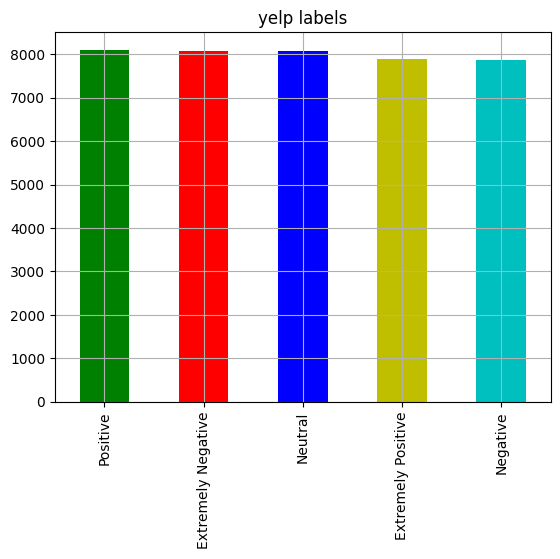

,text,sentiment
0,"It's the service that tips Blackwood's into 5 star territory, truly.\n\nWe came here to celebrate having successfully moved flat (and for a bit of a break from lugging boxes up three flights of stairs). We had an itison deal for rib eye, chips and a glass of wine each, and were looking forward to trying steak cooked on the famous Josper Grill!\n\nFor a Sunday evening it was quiet, there was only one other couple in the restaurant, but I suppose this meant we had the waiting staff's near undivided attention. The waiter explained that, unusually for a voucher, there were various substitutions that we could make if we wanted (Ostrich instead of rib eye for example), and we were delighted when he said that if we wanted a bottle of wine, rather than a glass, that they'd deduct the full price of the two glasses (rather than the deal saving) from the price of a bottle, meaning we only had to cough up an extra \u00a312 for a delicious Cabernet Sauvignon (which he'd recommended as going particularly well with the steak).\n\nAn amouse bouche of a tiny Yorkshire pudding with ox cheek was brought over, complimentary of course, served on a little slate plate. Adorable! And the bread was served in a sack, with three butters to choose from including a very nice coriander and lime.\n\nKip S went into raptures when he tried the steak, declaring it his favourite in Edinburgh (the Tuscan T-bone he had in Italy is his top one so far), and whilst for me it wasn't my absolute favourite, I did enjoy it a lot. The charcoal smell and taste from the Josper Grill adds both an extra element of taste and of appearance. My only criticism would be that the b\u00e9arnaise was a little on the runny side.\n\nAnd then for pudding I had an amazing frozen nougat parfait with pistachio cream. I think I'd died and gone to Heaven! Kip had an Americano with petit fours - homemade shortbread and melt in the mouth dark chocolate truffles.\n\nThe service is really top class, the waiters are friendly and knowledgeable. It really makes the difference when they take the time to explain to you how the grill works and what it does to the meat. As Claire L says in her review, you're not treated like deal scum, you're treated wonderfully!\n\nPlease, go to Blackwood's! It's actually reasonably priced even when you're not there with a voucher, and we'll definitely be returning.",Extremely Positive
1,"I stayed at this Marriott while visiting my family. It's priced right and the staff was very accomodating however, I will not be staying here again. The property was filthy...there were ants everywhere, the rooms were dirty and the worst was the pool. Just thinking about it is giving be goosebumps. The pool was lined with algae and dirt and around the pool was even worse. There were bee's and other bugs all over the place, cigarette's, ashes and debris all over. I even saw someone cleaning the pool who did retrieve some of the large leaves, etc. out of the pool but completely ignored the grime that had built up over probably years of negligence. They didnt bother to sweep or spray off around the pool and therefore I couldnt even bring myself to sit in the sunshine or walk without shoes on. We tried to enjoy a cup of coffee on the courtyard between the two properties and I had to stand because of how dirty everything was.",Negative
2,"Shear Shack is by appointment only. Not that this is apparent from their website where business hours are clearly listed, but this is clearly the case as I was turned away today by the stylist because \""she was just stopping in today.\""",Extremely Negative
3,"Came here for dinner with the wife, the service was great and the burgers were good. I really enjoyed myself here, I will likely return to this restaurant.",Neutral
4,"Their new space is SO much better than the old one. Love the new digs. I love the way the yarn is organized and it is easy to shop. Okay, that's out of the way. Let me just tell you about the most recent visit.\n

None


,text,clean_text
0,"It's the service that tips Blackwood's into 5 star territory, truly.\n\nWe came here to celebrate having successfully moved flat (and for a bit of a break from lugging boxes up three flights of stairs). We had an itison deal for rib eye, chips and a glass of wine each, and were looking forward to trying steak cooked on the famous Josper Grill!\n\nFor a Sunday evening it was quiet, there was only one other couple in the restaurant, but I suppose this meant we had the waiting staff's near undivided attention. The waiter explained that, unusually for a voucher, there were various substitutions that we could make if we wanted (Ostrich instead of rib eye for example), and we were delighted when he said that if we wanted a bottle of wine, rather than a glass, that they'd deduct the full price of the two glasses (rather than the deal saving) from the price of a bottle, meaning we only had to cough up an extra \u00a312 for a delicious Cabernet Sauvignon (which he'd recommended as going particularly well with the steak).\n\nAn amouse bouche of a tiny Yorkshire pudding with ox cheek was brought over, complimentary of course, served on a little slate plate. Adorable! And the bread was served in a sack, with three butters to choose from including a very nice coriander and lime.\n\nKip S went into raptures when he tried the steak, declaring it his favourite in Edinburgh (the Tuscan T-bone he had in Italy is his top one so far), and whilst for me it wasn't my absolute favourite, I did enjoy it a lot. The charcoal smell and taste from the Josper Grill adds both an extra element of taste and of appearance. My only criticism would be that the b\u00e9arnaise was a little on the runny side.\n\nAnd then for pudding I had an amazing frozen nougat parfait with pistachio cream. I think I'd died and gone to Heaven! Kip had an Americano with petit fours - homemade shortbread and melt in the mouth dark chocolate truffles.\n\nThe service is really top class, the waiters are friendly and knowledgeable. It really makes the difference when they take the time to explain to you how the grill works and what it does to the meat. As Claire L says in her review, you're not treated like deal scum, you're treated wonderfully!\n\nPlease, go to Blackwood's! It's actually reasonably priced even when you're not there with a voucher, and we'll definitely be returning.",it s the service that tips blackwood s into 5 star territory truly n nwe came here to celebrate having successfully moved flat and for a bit of a break from lugging boxes up three flights of stairs we had an itison deal for rib eye chips and a glass of wine each and were looking forward to trying steak cooked on the famous josper grill n nfor a sunday evening it was quiet there was only one other couple in the restaurant but i suppose this meant we had the waiting staff s near undivided attention the waiter explained that unusually for a voucher there were various substitutions that we could make if we wanted ostrich instead of rib eye for example and we were delighted when he said that if we wanted a bottle of wine rather than a glass that they d deduct the full price of the two glasses rather than the deal saving from the price of a bottle meaning we only had to cough up an extra u00a312 for a delicious cabernet sauvignon which he d recommended as going particularly well with the steak n nan amouse bouche of a tiny yorkshire pudding with ox cheek was brought over complimentary of course served on a little slate plate adorable and the bread was served in a sack with three butters to choose from including a very nice coriander and lime n nkip s went into raptures when he tried the steak declaring it his favourite in edinburgh the tuscan t bone he had in italy is his top one so far and whilst for me it wasn t my absolute favourite i did enjoy it a lot the charcoal smell and taste from the josper grill adds both an extra element of taste and of appearance my only criticism would be that

None


None




Current dataset: corona


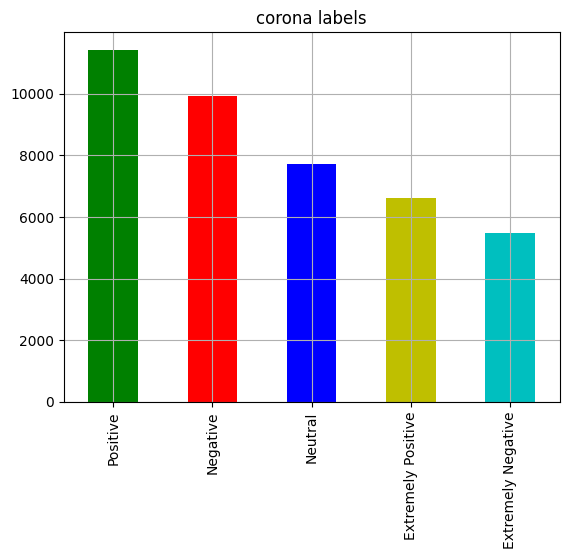

,text,sentiment
0,Britain? \r\r\n...also Britain. ????\r\r\n#StopHoarding https://t.co/28o2TOwlHR,Neutral
1,Statistics Canada reveals a marginal increase in consumer price in February. \r\r\n#Canada #ConsumerPrices #CPI #ForexNews #Coronavirus #USDCAD #DouglasPorter #BankOfCanada\r\r\nhttps://t.co/mxexkA2TBo,Positive
2,?VIRUS SCAMS [part 1]\r\r\nBad guys pounce to profit from the pandemic. (12/19) #Covid_19\r\r\n?https://t.co/5y5SVqKG1L h/t @JJtheTexan,Extremely Negative
3,Now with and self quarantines the norm has suffered a one two punch as consumer spending at brick and mortar sites has all but stopped,Negative
4,"Social Distancing day 23\r\r\n- went to the grocery store. Still no flour, TP, or sanitizing wipes.\r\r\n- I figured I was going to be the only one wearing a mask, so I was pleasantly surprised when I wasn't.\r\r\n- I made a new friend today.\r\r\n \r\r\n#StayHomeSaveLives #COVID19 https://t.co/KsJWEbCPbH",Extremely Positive


None


,text,clean_text
0,Britain? \r\r\n...also Britain. ????\r\r\n#StopHoarding https://t.co/28o2TOwlHR,britain also britain
1,Statistics Canada reveals a marginal increase in consumer price in February. \r\r\n#Canada #ConsumerPrices #CPI #ForexNews #Coronavirus #USDCAD #DouglasPorter #BankOfCanada\r\r\nhttps://t.co/mxexkA2TBo,statistics canada reveals a marginal increase in consumer price in february
2,?VIRUS SCAMS [part 1]\r\r\nBad guys pounce to profit from the pandemic. (12/19) #Covid_19\r\r\n?https://t.co/5y5SVqKG1L h/t @JJtheTexan,virus scams part bad guys pounce to profit from the pandemic 12 19 h t
3,Now with and self quarantines the norm has suffered a one two punch as consumer spending at brick and mortar sites has all but stopped,now with and self quarantines the norm has suffered a one two punch as consumer spending at brick and mortar sites has all but stopped
4,"Social Distancing day 23\r\r\n- went to the grocery store. Still no flour, TP, or sanitizing wipes.\r\r\n- I figured I was going to be the only one wearing a mask, so I was pleasantly surprised when I wasn't.\r\r\n- I made a new friend today.\r\r\n \r\r\n#StayHomeSaveLives #COVID19 https://t.co/KsJWEbCPbH",social distancing day went to the grocery store still no flour tp or sanitizing wipes i figured i was going to be the only one wearing a mask so i was pleasantly surprised when i wasn t i made a new friend today


None


,clean_text,tokenized_clean_text
0,britain also britain,"['britain', 'also', 'britain']"
1,statistics canada reveals a marginal increase in consumer price in february,"['statistics', 'canada', 'reveals', 'a', 'marginal', 'increase', 'in', 'consumer', 'price', 'in', 'february']"
2,virus scams part bad guys pounce to profit from the pandemic 12 19 h t,"['virus', 'scams', 'part', 'bad', 'guys', 'pounce', 'to', 'profit', 'from', 'the', 'pandemic', '12', '19', 'h', 't']"
3,now with and self quarantines the norm has suffered a one two punch as consumer spending at brick and mortar sites has all but stopped,"['now', 'with', 'and', 'self', 'quarantines', 'the', 'norm', 'has', 'suffered', 'a', 'one', 'two', 'punch', 'as', 'consumer', 'spending', 'at', 'brick', 'and', 'mortar', 'sites', 'has', 'all', 'but', 'stopped']"
4,social distancing day went to the grocery store still no flour tp or sanitizing wipes i figured i was going to be the only one wearing a mask so i was pleasantly surprised when i wasn t i made a new friend today,"['social', 'distancing', 'day', 'went', 'to', 'the', 'grocery', 'store', 'still', 'no', 'flour', 'tp', 'or', 'sanitizing', 'wipes', 'i', 'figured', 'i', 'was', 'going', 'to', 'be', 'the', 'only', 'one', 'wearing', 'a', 'mask', 'so', 'i', 'was', 'pleasantly', 'surprised', 'when', 'i', 'wasn', 't', 'i', 'made', 'a', 'new', 'friend', 'today']"


None






In [23]:
for dataset_name in DATASET_PATHS:
    print(f'Current dataset: {dataset_name}')
    df = load_preprocessed_data(DATASET_PATHS[dataset_name])
    label_mapping = DATASET_LABEL_TO_INDEX[dataset_name]
    
    plot_distributions(df)
    
    sample_df = sample_data(df)

    raw_text_sample = sample_df[['text', 'sentiment']]
    print(display(HTML(raw_text_sample.to_html())))
    
    clean_text_sample = sample_df[['text', 'clean_text']]
    print(display(HTML(clean_text_sample.to_html())))
    
    tokenized_text_sample =  sample_df[['clean_text', 'tokenized_clean_text']]
    print(display(HTML(tokenized_text_sample.to_html())))
    
    print("\n\n\n")